<a href="https://colab.research.google.com/github/akkirajubhavana/SMAI_2024_ASSIGNMENTS/blob/main/SMAI_A1_Q3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



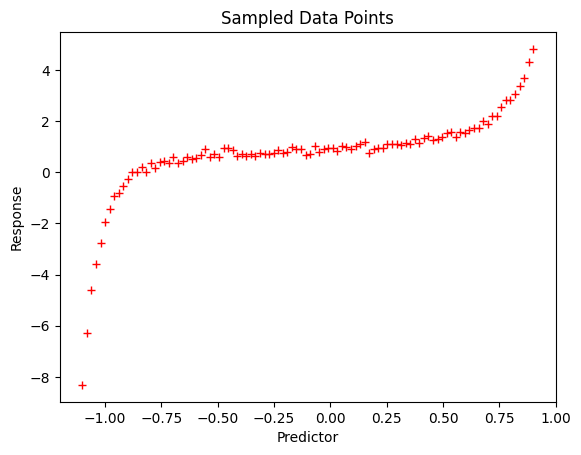

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
# def linear_regression(x, y):
#     # Add a column of ones to the input for the intercept term
#     X = np.column_stack((np.ones_like(x), x))

#     # Calculate the coefficients using the normal equation
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y

#     # Return the coefficients (beta0, beta1)
#     return beta[0], beta[1]

In [ ]:
# def linear_regression(x, y, multiple=False):
#     if not multiple:
#         # Simple linear regression
#         X = np.column_stack((np.ones_like(x), x))
#     else:
#         # Multiple linear regression
#         X = np.column_stack((np.ones_like(y), x))

#     # Calculate the coefficients using the normal equation
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y

#     # Return the coefficients
#     return beta

In [ ]:
# def linear_regression(X, y, multiple=False):
#     if not multiple:
#         # Simple linear regression
#         X = np.column_stack((np.ones_like(X), X))
#     else:
#         # Multiple linear regression with intercept
#         X = np.column_stack((np.ones(X.shape[0]), X))

#     # Calculate the coefficients using the normal equation
#     beta = np.linalg.inv(X.T @ X) @ X.T @ y

#     # Return the coefficients
#     return beta


In [ ]:
import numpy as np

def linear_regression(X, y, multiple=False):
    if not multiple:
        # Simple linear regression
        X = np.column_stack((np.ones_like(X), X))
    else:
        # Multiple linear regression with intercept
        X = np.column_stack((np.ones(X.shape[0]), X))

    # Calculate the coefficients using the normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    # Return the coefficients
    return beta


In [ ]:
def calculate_mse(X, y, beta, multiple=False):
    if not multiple:
        # Simple linear regression with intercept
        X_with_intercept = np.column_stack((np.ones_like(X), X))
    else:
        # Multiple linear regression with intercept
        X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

    # Calculate predicted y values
    y_pred = X_with_intercept @ beta

    # Calculate MSE
    mse = np.mean((y - y_pred) ** 2)

    return mse

In [ ]:
def fit_polynomial(x, y, degree, regularization_type=None, alpha=0):
    X = np.column_stack([x**k for k in range(degree + 1)])

    if regularization_type is None:
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
    elif regularization_type == 'L2':
        beta = np.linalg.inv(X.T @ X + alpha * np.eye(degree + 1)) @ X.T @ y
    elif regularization_type == 'L1':
        beta = fit_lasso_regression(X, y, alpha)
    else:
        raise ValueError("Invalid regularization type. Use 'L2' or 'L1'.")

    return beta

In [ ]:
def calculate_mse_poly(x, y, coeffs):
    y_pred = np.column_stack([x**k for k in range(len(coeffs))]) @ coeffs
    mse = np.mean((y - y_pred)**2)
    return mse

In [ ]:
def choose_best_polynomial_degree(x, y, max_degree):
    best_degree = 1
    best_mse = float('inf')

    for degree in range(1, max_degree + 1):
        coeffs = fit_polynomial(x, y, degree)
        mse = calculate_mse(x, y, coeffs)

        # Update best degree if current fit has lower MSE
        if mse < best_mse:
            best_degree = degree
            best_coeffs = coeffs
            best_mse = mse

    return best_degree, best_coeffs

In [ ]:
# Generate data
predictor, response = gen_data()

In [ ]:
# Experiment 1: Fit a line (linear regression)
beta_linear = linear_regression(predictor, response,multiple=False)
# mse_linear = calculate_mse_linear(predictor, response, beta_linear[0], beta_linear[1])
mse_linear = calculate_mse(predictor,response,beta_linear)
print(mse_linear)

1.365358927858824


In [ ]:
# Experiment 2: Fit a polynomial and choose the degree
max_degree = 25
best_degree, best_coeffs = choose_best_polynomial_degree(predictor, response, max_degree)
mse_poly = calculate_mse(predictor, response, best_coeffs)

print(mse_poly)

0.006293728832947808


In [ ]:

# Experiment 3: Fit a 25-degree polynomial
coeff_25_degree = fit_polynomial(predictor, response, 25)
mse_poly_25_degree = calculate_mse(predictor, response, coeff_25_degree)

print(mse_poly_25_degree)

0.2490056704018393


In [ ]:
# Print results in tabular form
results_table = tabulate([
    ['Linear Regression', mse_linear],
    [f'Polynomial (Best Degree: {best_degree})', mse_poly],
    ['Polynomial (25-degree)', mse_poly_25_degree]
], headers=['Experiment', 'Mean Squared Error'], tablefmt='pretty')

print(results_table)

+------------------------------+----------------------+
|          Experiment          |  Mean Squared Error  |
+------------------------------+----------------------+
|      Linear Regression       |  1.365358927858824   |
| Polynomial (Best Degree: 19) | 0.006293728832947808 |
|    Polynomial (25-degree)    |  0.2490056704018393  |
+------------------------------+----------------------+


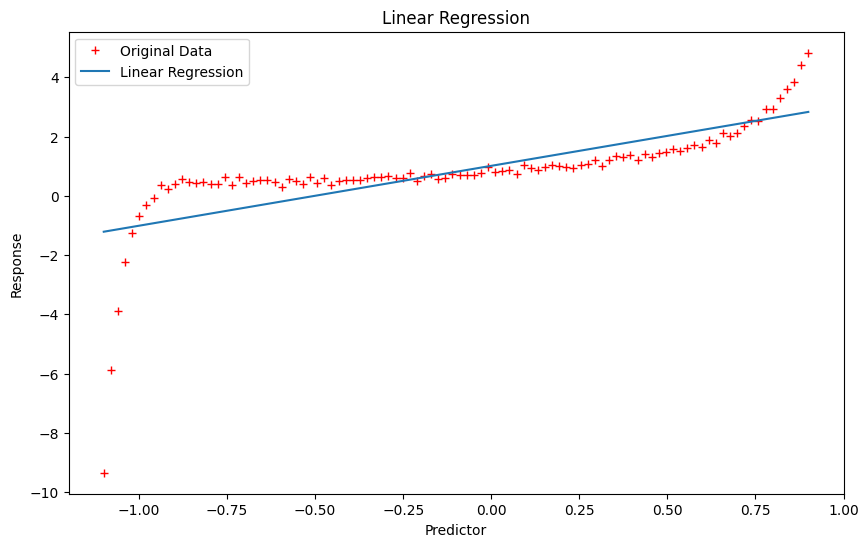

In [ ]:

# Plotting Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, beta_linear[0] + beta_linear[1] * predictor, label='Linear Regression')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression')
plt.legend()
plt.show()

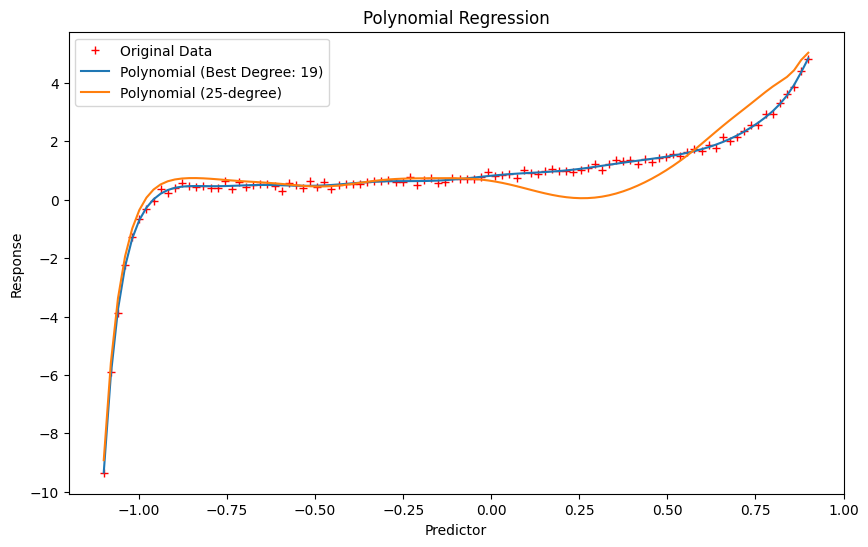

In [ ]:
# Plotting Polynomial Regression (Best Degree) and (25-degree)
plt.figure(figsize=(10, 6))
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, np.column_stack([predictor**k for k in range(best_degree + 1)]) @ best_coeffs,
         label=f'Polynomial (Best Degree: {best_degree})')
plt.plot(predictor, np.column_stack([predictor**k for k in range(26)]) @ coeff_25_degree,
         label='Polynomial (25-degree)')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

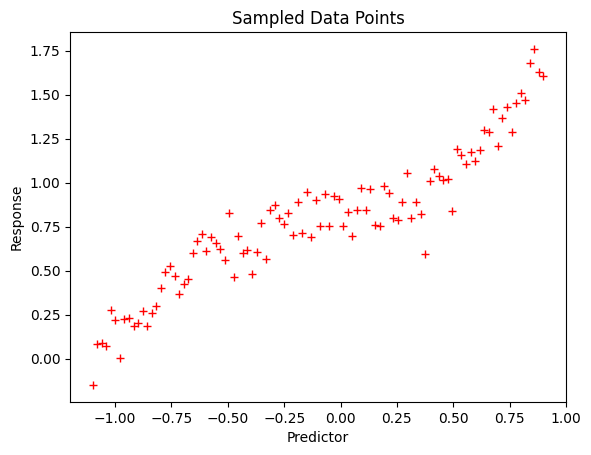

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
# Generate data
x, y = gen_data_low()

In [ ]:
def plot_polynomial_fit(x, y, beta, degree, title):
    x_fit = np.linspace(-1.1, 0.9, 100)
    X_fit = np.column_stack([x_fit**k for k in range(degree + 1)])
    y_fit = X_fit @ beta

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='red', label='Original Data')
    plt.plot(x_fit, y_fit, label=f'Fitted Polynomial (Degree {degree})')
    plt.title(title)
    plt.xlabel('Predictor')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

    return y_fit

In [ ]:
def fit_lasso_regression(X, y, alpha):
    from scipy.optimize import minimize

    def lasso_loss(beta):
        return np.sum((X @ beta - y)**2) + alpha * np.sum(np.abs(beta))

    initial_guess = np.zeros(X.shape[1])
    result = minimize(lasso_loss, initial_guess, method='L-BFGS-B')
    return result.x

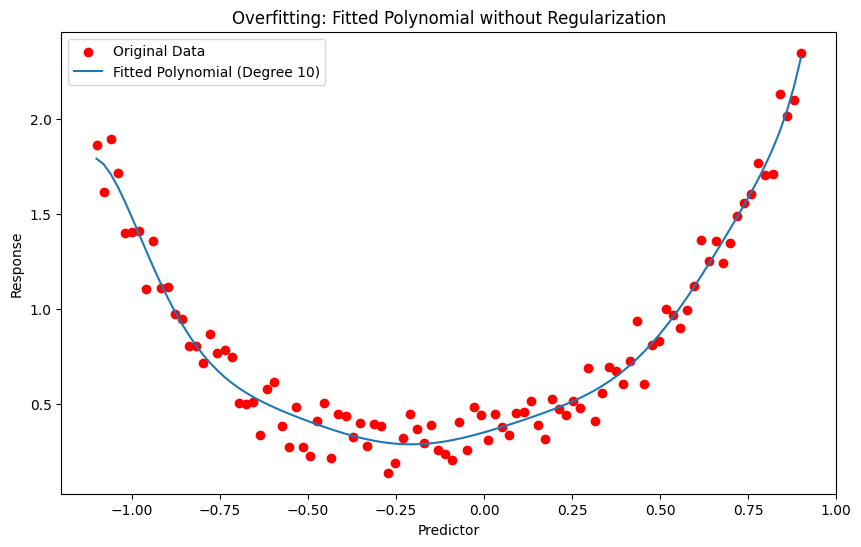

MSE on Training Set (Overfitting): 0.0083
MSE on Testing Set (Overfitting): 0.0140



In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a higher degree polynomial without regularization (overfitting)
degree = 10
beta_overfitting = fit_polynomial(x_train, y_train, degree)
y_train_pred_overfitting = np.column_stack([x_train**k for k in range(degree + 1)]) @ beta_overfitting
y_test_pred_overfitting = np.column_stack([x_test**k for k in range(degree + 1)]) @ beta_overfitting

# Plot the results for overfitting
plot_polynomial_fit(x, y, beta_overfitting, degree, 'Overfitting: Fitted Polynomial without Regularization')

# Display MSE values for overfitting
mse_train_overfitting = calculate_mse(x_train, y_train, beta_overfitting)
mse_test_overfitting = calculate_mse(x_test, y_test, beta_overfitting)
print(f'MSE on Training Set (Overfitting): {mse_train_overfitting:.4f}')
print(f'MSE on Testing Set (Overfitting): {mse_test_overfitting:.4f}\n')




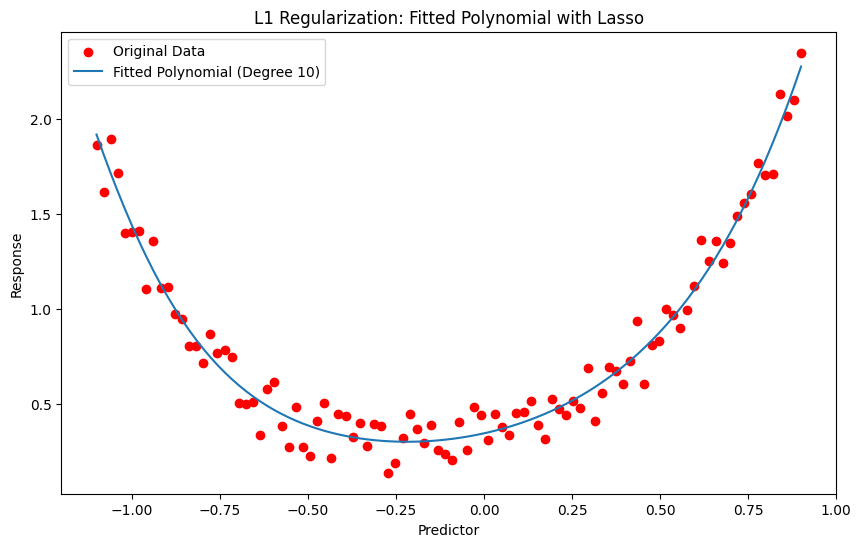

MSE on Training Set (L1 Regularization): 0.0087
MSE on Testing Set (L1 Regularization): 0.0087



In [ ]:


# Fit a higher degree polynomial with L1 (Lasso) regularization
alpha_l1 = 0.01
degree = 10
beta_l1 = fit_polynomial(x_train, y_train, degree, regularization_type='L1', alpha=alpha_l1)
y_train_pred_l1 = np.column_stack([x_train**k for k in range(degree + 1)]) @ beta_l1
y_test_pred_l1 = np.column_stack([x_test**k for k in range(degree + 1)]) @ beta_l1

# Plot the results for L2 regularization
plot_polynomial_fit(x, y, beta_l1, degree, 'L1 Regularization: Fitted Polynomial with Lasso')

# Display MSE values for L2 regularization
mse_train_l1 = calculate_mse(x_train, y_train, beta_l1)
mse_test_l1 = calculate_mse(x_test, y_test, beta_l1)
print(f'MSE on Training Set (L1 Regularization): {mse_train_l1:.4f}')
print(f'MSE on Testing Set (L1 Regularization): {mse_train_l1:.4f}\n')

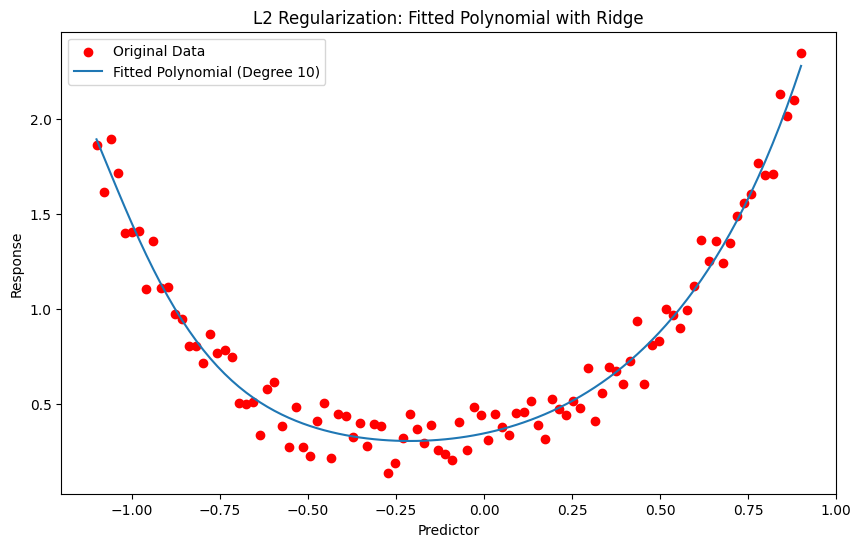

MSE on Training Set (L2 Regularization): 0.0086
MSE on Testing Set (L2 Regularization): 0.0122



In [ ]:
# Fit a higher degree polynomial with L2 (Ridge) regularization
alpha_l2 = 0.01
degree = 10
beta_l2 = fit_polynomial(x_train, y_train, degree, regularization_type='L2', alpha=alpha_l2)
y_train_pred_l2 = np.column_stack([x_train**k for k in range(degree + 1)]) @ beta_l2
y_test_pred_l2 = np.column_stack([x_test**k for k in range(degree + 1)]) @ beta_l2

# Plot the results for L2 regularization
plot_polynomial_fit(x, y, beta_l2, degree, 'L2 Regularization: Fitted Polynomial with Ridge')

# Display MSE values for L2 regularization
mse_train_l2 = calculate_mse(x_train, y_train, beta_l2)
mse_test_l2 = calculate_mse(x_test, y_test, beta_l2)
print(f'MSE on Training Set (L2 Regularization): {mse_train_l2:.4f}')
print(f'MSE on Testing Set (L2 Regularization): {mse_test_l2:.4f}\n')

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [ ]:
X_multi = credit[['Income', 'Age', 'Limit', 'Rating', 'Cards', 'Education']]
y_multi = credit['Balance']




In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [ ]:

# Perform multiple linear regression using the linear_regression function on the training set
beta_multiple = linear_regression(X_train_multi.values, y_train_multi.values,multiple=True)


In [ ]:
mse_multiple = calculate_mse(X_test_multi.values, y_test_multi.values, beta_multiple, multiple=True)
print(f'MSE for Multiple Linear Regression: {mse_multiple:.4f}')

MSE for Multiple Linear Regression: 29863.8735


In [ ]:
import statsmodels.api as sm
# Add constant for multiple linear regression
X_train_multi = sm.add_constant(X_train_multi)

# Fit the multiple linear regression model
model_multi = sm.OLS(y_train_multi, X_train_multi).fit()

# Display the summary with p-values
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     415.5
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          8.41e-146
Time:                        04:05:25   Log-Likelihood:                -2072.7
No. Observations:                 320   AIC:                             4159.
Df Residuals:                     313   BIC:                             4186.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -459.5208     61.395     -7.485      0.0

#Observations

  => Based on above statistics 'Age', 'Rating', and 'Education' have p-values greater than 0.05, suggesting they may not be statistically significant predictors

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluate the model on the test set
X_test_multi = sm.add_constant(X_test_multi)
y_pred_multi = model_multi.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
print(f'MSE for Multiple Linear Regression: {mse_multi:.4f}')

MSE for Multiple Linear Regression: 29863.8735


In [ ]:
# Add the interaction term
X_multi['Rating_Age_Interact'] = X_multi['Rating'] * X_multi['Age']

# Split the data into training and testing sets
X_train_interact, X_test_interact, y_train_interact, y_test_interact = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Add constant for multiple linear regression
X_train_interact = sm.add_constant(X_train_interact)

# Fit the multiple linear regression model with the interaction term
model_interact = sm.OLS(y_train_interact, X_train_interact).fit()

# Display the summary with p-values
print(model_interact.summary())




                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          1.79e-144
Time:                        04:05:58   Log-Likelihood:                -2072.7
No. Observations:                 320   AIC:                             4161.
Df Residuals:                     312   BIC:                             4191.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -460.8749    





*   The p-value of 0.984 is much greater than the common significance level of 0.05, indicating that the interaction effect is not statistically significant.
*   
The interaction term does not seem to have a meaningful impact on the model, and its coefficient is not statistically different from zero.



In [ ]:
# Evaluate the model on the test set
X_test_interact = sm.add_constant(X_test_interact)
y_pred_interact = model_interact.predict(X_test_interact)
mse_interact = mean_squared_error(y_test_interact, y_pred_interact)
print(f'MSE for Model with Interaction: {mse_interact:.4f}')

MSE for Model with Interaction: 29852.9656


In [ ]:
mse_data = [
    ["Multiple Linear Regression using linear_regression()",mse_multiple],
    ["Multiple Linear Regression", mse_multi],
    ["Model with Interaction", mse_interact]
]
headers = ["Model", "MSE"]

In [ ]:
print(tabulate(mse_data, headers=headers, tablefmt="grid"))

+------------------------------------------------------+---------+
| Model                                                |     MSE |
+======================================================+=========+
| Multiple Linear Regression using linear_regression() | 29863.9 |
+------------------------------------------------------+---------+
| Multiple Linear Regression                           | 29863.9 |
+------------------------------------------------------+---------+
| Model with Interaction                               | 29853   |
+------------------------------------------------------+---------+


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:
# your code here
X_with_icecream = sharks.drop('SharkAttacks', axis=1)
y_shark = sharks['SharkAttacks']
from sklearn.linear_model import LinearRegression

In [ ]:
# Split data
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_icecream, y_shark, test_size=0.2, random_state=42)

model_with = LinearRegression()
model_with.fit(X_train_with, y_train_with)

y_pred_with = model_with.predict(X_test_with)
error_with = mean_squared_error(y_test_with, y_pred_with)
print(f"Error with Ice Cream Sales: {error_with}")

Error with Ice Cream Sales: 37.67537629667506


In [ ]:
# without IceCreamSales
X_without_icecream = sharks.drop(['SharkAttacks', 'IceCreamSales'], axis=1)
X_train_without, X_test_without = train_test_split(X_without_icecream, test_size=0.2, random_state=42)

model_without = LinearRegression()
model_without.fit(X_train_without, y_train_with)

y_pred_without = model_without.predict(X_test_without)
error_without = mean_squared_error(y_test_with, y_pred_without)
print(f"Error without Ice Cream Sales: {error_without}")
print(f"Error with Ice Cream Sales: {error_with}")

Error without Ice Cream Sales: 43.38138077679057
Error with Ice Cream Sales: 37.67537629667506


=> In this case, the model with Ice Cream Sales has a lower error (37.68) compared to the model without Ice Cream Sales (43.38).
=>Lower mean squared error indicates better model performance, so including Ice Cream Sales as a predictor appears to improve the predictive accuracy of the model in this context.